In [1]:
import math, numpy
from matplotlib import pyplot
# отображение картинок в блокноте
%matplotlib inline

In [2]:
N = 51
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y) # Создаем сетку



In [3]:
#для равномерного потока
u_inf = 1.0        # скорость на бесконечности

# вычисляем компоненты скорости равномерного потока
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# вычисляем функцию тока
psi_freestream = u_inf * Y

In [4]:
# для источника или стока, определяет компоненты скорости U и V
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [5]:
# для источника или стока, определяет функцию тока
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [7]:
NX = numpy.loadtxt("NACA0012_x.txt")
NY = numpy.loadtxt("NACA0012_y.txt")
NS = numpy.loadtxt("NACA0012_sigma.txt")

In [8]:
u, v, psi = u_freestream, v_freestream, psi_freestream
for i in range(NX.shape[0]):
    # добавим источники в равномерный поток
    strength_source = NS[i]            # интенсивность источника
    x_source, y_source = NX[i], NY[i]   # положение источника

    # вычисляем поле скоростей
    u_source, v_source = get_velocity(strength_source, x_source, y_source,\
                                      X, Y)

    # вычисляем функцию тока
    psi_source = get_stream_function(strength_source, x_source, y_source,\
                                     X, Y)
    # суперпозиция свободного потока, источника и стока
    u += u_source 
    v += v_source 
    psi += psi_source 

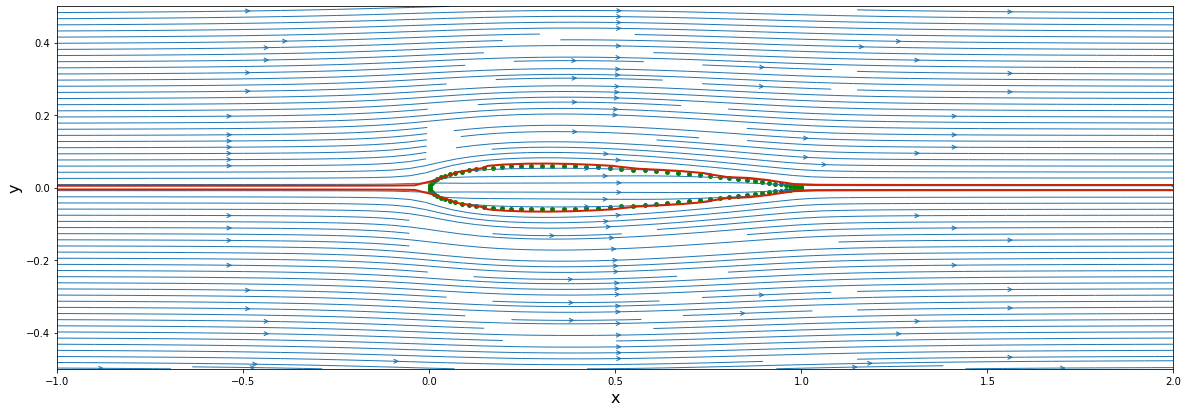

In [9]:
# рисуем линии тока

size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter(NX, NY, color='g',\
               s=15, marker='o')
pyplot.contour(X, Y, psi, levels=[-NS.max(), +NS.max()], colors='#CD2305', linewidths=2,\
               linestyles='solid');

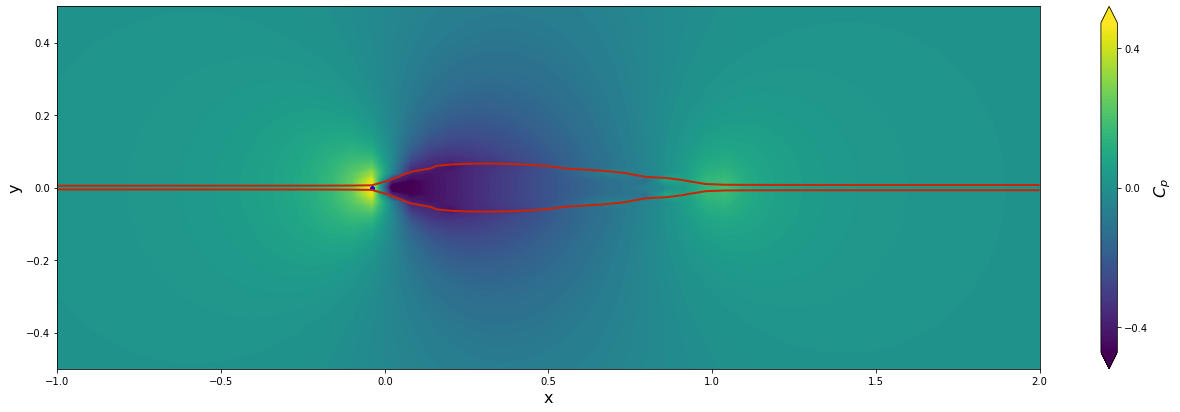

In [31]:
# вычисляем поле коэффициента давления
cp = 1.0 - (u**2+v**2)/u_inf**2

# рисуем поле коэффициента давления
size = 20
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
mx, my = numpy.unravel_index(cp.argmax(), cp.shape)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-cp[mx][my], cp[mx][my], 100),\
                        extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.4, 0.0, 0.4])

pyplot.scatter(X[mx][my], 0.0, color='b',s=15, marker='o')
pyplot.contour(X, Y, psi, levels=[-NS.max(), +NS.max()], colors='#CD2305', linewidths=2,\
               linestyles='solid');

In [27]:
cp[mx][my]

0.4714436613316235